In [1]:
import numpy as np
import pandas as pd
from nbodykit.lab import *
from nbodykit.source.catalog import CSVCatalog
from nbodykit import setup_logging, style
from nbodykit.binned_statistic import BinnedStatistic
from scipy.fft import fft, fftfreq

import matplotlib.pyplot as plt
plt.style.use(style.notebook)

In [1]:
def graphFunction(x,y, color=["purple","blue"], labels=["x","y"], titulo="", scatter=False, corte=[0,-1], limite=[]):
    '''
    Descripción: Función que grafica y con respecto a x
    IN = {
        x: Variable independiente.
        y: Variable dependiente.
        color: El color de la gráfica.
        labels: El nombre de las variables.
        titulo: El título
        scatter: Si es que se quieren resaltar los puntos
    }
    Out: Una bonita gráfica x-y
    '''
    # Creamos el objeto figura y nuestro ax.
    fig, ax = plt.subplots(figsize = (5, 3))
    # ponemos título
    ax.set_title(titulo)
    # Graficamos
    if scatter:
        ax.scatter(x[corte[0]:corte[1]],y[corte[0]:corte[1]], marker='.', c=color[0])
    ax.plot(x[corte[0]:corte[1]], y[corte[0]:corte[1]], color=color[1]) # Graficamos
    ax.set_xlabel(labels[0]) # Asignamos nombres a los labels
    ax.set_ylabel(labels[1]) # Asignamos nombres a los labels
    if limite != []:
        plt.ylim(top = max(limite), bottom= min(limite))
    ax.grid() # Con cuadrícula

In [3]:
# Reading the data
columns = ["x", "y", "z", "vx", "vy", "vz"]
# read the data
f = CSVCatalog('./data/example_128_z0p000.*', columns)

# combine x, y, z to Position
f['Position'] = f['x'][:, None] * [1, 0, 0] + f['y'][:, None] * [0, 1, 0] + f['z'][:, None] * [0, 0, 1]
f.attrs["BoxSize"] = [512., 512., 512.]

In [4]:
f["Position"]

dask.array<add, shape=(2097152, 3), dtype=float64, chunksize=(100000, 3), chunktype=numpy.ndarray>

In [13]:
# Converting to a mesh
mesh = f.to_mesh(window='tsc', Nmesh=512, compensated=True)

<ipython-input-13-cbdd4ec360d6>:2: DeprecationWarning: The window argument is deprecated. Use `resampler=` instead
  mesh = f.to_mesh(window='tsc', Nmesh=512, compensated=True)


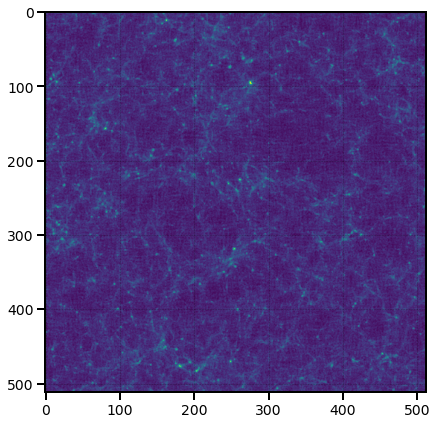

In [5]:
# Visuailzation
plt.imshow(mesh.preview(axes=[0,2]))

In [6]:
# Computing the Power Spectrum
r = FFTPower(mesh, mode='1d')

In [11]:
# the result is stored at "power" attribute
Pk = r.power
print(Pk)

<BinnedStatistic: dims: (k: 256), variables: ('k', 'power', 'modes')>


In [13]:
# Saving Results
Pk.to_json("./results/PowerSpectrumOfExample_128_z.json")

# Loading Data

In [3]:
corr = SimulationBox2PCF.load("./results/CorrelationFuncionOfExample_128_z.json")

In [4]:
corr.attrs

{'mode': '1d',
 'edges': array([ 10.66666667,  21.33333333,  32.        ,  42.66666667,
         53.33333333,  64.        ,  74.66666667,  85.33333333,
         96.        , 106.66666667, 117.33333333, 128.        ,
        138.66666667, 149.33333333, 160.        , 170.66666667]),
 'Nmu': None,
 'pimax': None,
 'periodic': True,
 'BoxSize': 512.0,
 'los': 'z',
 'weight': 'Weight',
 'position': 'Position',
 'show_progress': True,
 'config': {}}

In [5]:
corr.corr["corr"]

array([ 0.13033508,  0.04317151,  0.01857243,  0.00999129,  0.00601546,
        0.00446219,  0.00413579,  0.00435532,  0.00361402,  0.00242464,
        0.00148272,  0.00055878, -0.00016605, -0.00040532, -0.00014201])

In [6]:
# Loading Results
Pk = BinnedStatistic.from_json("./results/PowerSpectrumOfExample_128_z.json")

In [7]:
# Just Checking
print(Pk.shape)
print(Pk.dims)
print(Pk.variables)

(256,)
['k']
['k', 'power', 'modes']


In [8]:
# print out the meta-data
for k in Pk.attrs:
    print("{} = {}".format(k, str(Pk.attrs[k])))

Nmesh = [512 512 512]
BoxSize = [512. 512. 512.]
Lx = 512.0
Ly = 512.0
Lz = 512.0
volume = 134217728.0
mode = 1d
los = [0, 0, 1]
Nmu = 1
poles = []
dk = 0.01227184630308513
kmin = 0.0
kmax = None
N1 = 2097152
N2 = 2097152
shotnoise = 64.0


In [9]:
# Just Checking x2
for i in range(len(Pk["power"].real)):
    print(" {:e} \t {:e}".format(Pk["k"][i], Pk["power"][i].real))

 0.000000e+00 	 0.000000e+00
 1.738211e-02 	 3.505292e+04
 3.006509e-02 	 1.964194e+04
 4.209076e-02 	 1.270219e+04
 5.436838e-02 	 8.949512e+03
 6.718611e-02 	 9.350694e+03
 7.935624e-02 	 8.583404e+03
 9.146266e-02 	 6.314045e+03
 1.037382e-01 	 5.300765e+03
 1.161594e-01 	 4.705280e+03
 1.284419e-01 	 3.977648e+03
 1.405839e-01 	 3.592244e+03
 1.531395e-01 	 3.358471e+03
 1.656656e-01 	 2.814760e+03
 1.777253e-01 	 2.453201e+03
 1.898705e-01 	 2.305703e+03
 2.021022e-01 	 2.083519e+03
 2.143837e-01 	 1.952015e+03
 2.267281e-01 	 1.756710e+03
 2.390369e-01 	 1.609646e+03
 2.513315e-01 	 1.490680e+03
 2.635744e-01 	 1.387752e+03
 2.757775e-01 	 1.282803e+03
 2.881225e-01 	 1.203704e+03
 3.003690e-01 	 1.188802e+03
 3.126836e-01 	 1.074480e+03
 3.250878e-01 	 1.004140e+03
 3.373880e-01 	 9.655509e+02
 3.495975e-01 	 8.841058e+02
 3.618114e-01 	 8.625313e+02
 3.740159e-01 	 8.292370e+02
 3.863288e-01 	 7.802193e+02
 3.986515e-01 	 7.437416e+02
 4.109525e-01 	 7.298758e+02
 4.232515e-01 

In [31]:
# Definition of things
xi = corr.corr["corr"]
r = corr.corr["r"]
k = Pk["k"][1:]
power = Pk["power"][1:]

Text(0, 0.5, '$P(k)$ [$h^{-3}\\mathrm{Mpc}^3$]')

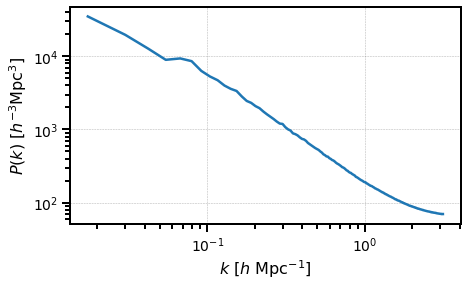

In [32]:
# Ploting the Pecrum
fig, ax = plt.subplots(figsize = (7, 4))


plt.loglog(k, power.real)

# format the axes
plt.xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]")
plt.ylabel(r"$P(k)$ [$h^{-3}\mathrm{Mpc}^3$]")

In [33]:
# Reading the comparision data
columns = ["k", "Pk"]
# read the data
spectrum = CSVCatalog('./data/input_spectrum.dat', columns)

spectrum.attrs["BoxSize"] = [512., 512., 512.]

/home/bubu/miniconda3/envs/nbodykit/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, '$P(k)$ [$h^{-3}\\mathrm{Mpc}^3$]')

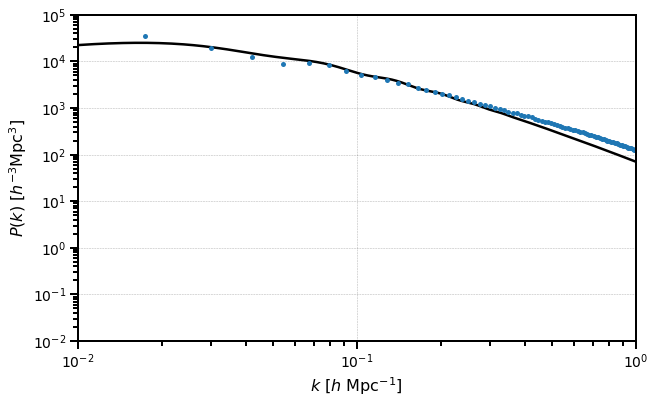

In [34]:
# Ploting the comparation data
fig, ax = plt.subplots(figsize = (10, 6))

# print the shot noise subtracted P(k)
ax.loglog(spectrum['k'], spectrum['Pk'], c="black")
ax.loglog(k, power - Pk.attrs["shotnoise"], ".")

plt.xlim(1e-2, 1)
plt.ylim(1e-2, 1e5)
plt.xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]")
plt.ylabel(r"$P(k)$ [$h^{-3}\mathrm{Mpc}^3$]")

In [35]:
def DFT(x):
    """
    Compute the discrete Fourier Transform of the 1D array x
    :param x: (array)
    """

    N = x.size
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    return np.dot(e, x)

In [46]:
dft_ps = DFT(np.array(spectrum["Pk"]))

/home/bubu/miniconda3/envs/nbodykit/lib/python3.8/site-packages/dask/array/core.py:1378: ComplexWarning: Casting complex values to real discards the imaginary part
  x = x.astype(dtype)


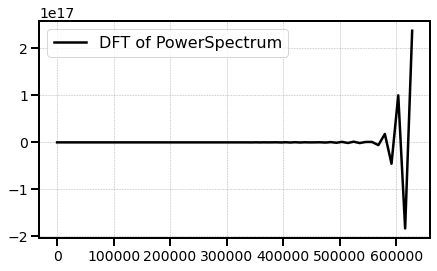

In [48]:
# Ploting the comparation data
fig, ax = plt.subplots(figsize = (7, 4))

# print the shot noise subtracted P(k)
ax.plot(2 * np.pi / spectrum["k"], 2 * np.pi / spectrum["k"] ** 2 * dft_ps, c="black", label="DFT of PowerSpectrum")
#ax.plot(r, r ** 2 * xi, label="r^2 * ξ")

#plt.xlim(15,170)
#plt.ylim(-15,40)
plt.legend()
#plt.xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]")
#plt.ylabel(r"$P(k)$ [$h^{-3}\mathrm{Mpc}^3$]")

/home/bubu/miniconda3/envs/nbodykit/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


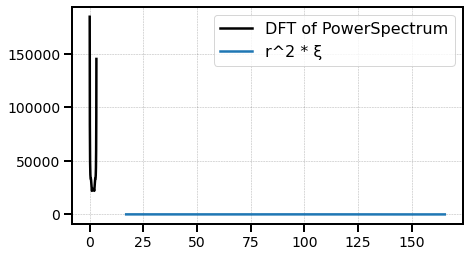

In [42]:
# Ploting the comparation data
fig, ax = plt.subplots(figsize = (7, 4))

# print the shot noise subtracted P(k)
ax.plot(k, dft_ps, c="black", label="DFT of PowerSpectrum")
ax.plot(r, r**2 * xi, label="r^2 * ξ")

#plt.xlim(15,170)
#plt.ylim(-15,40)
plt.legend()
#plt.xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]")
#plt.ylabel(r"$P(k)$ [$h^{-3}\mathrm{Mpc}^3$]")